<h1 align="center">Lab 6: Implementation of Decision Trees for Classification</h1>

<h3 align="center">Type of Information in a Node</h3>

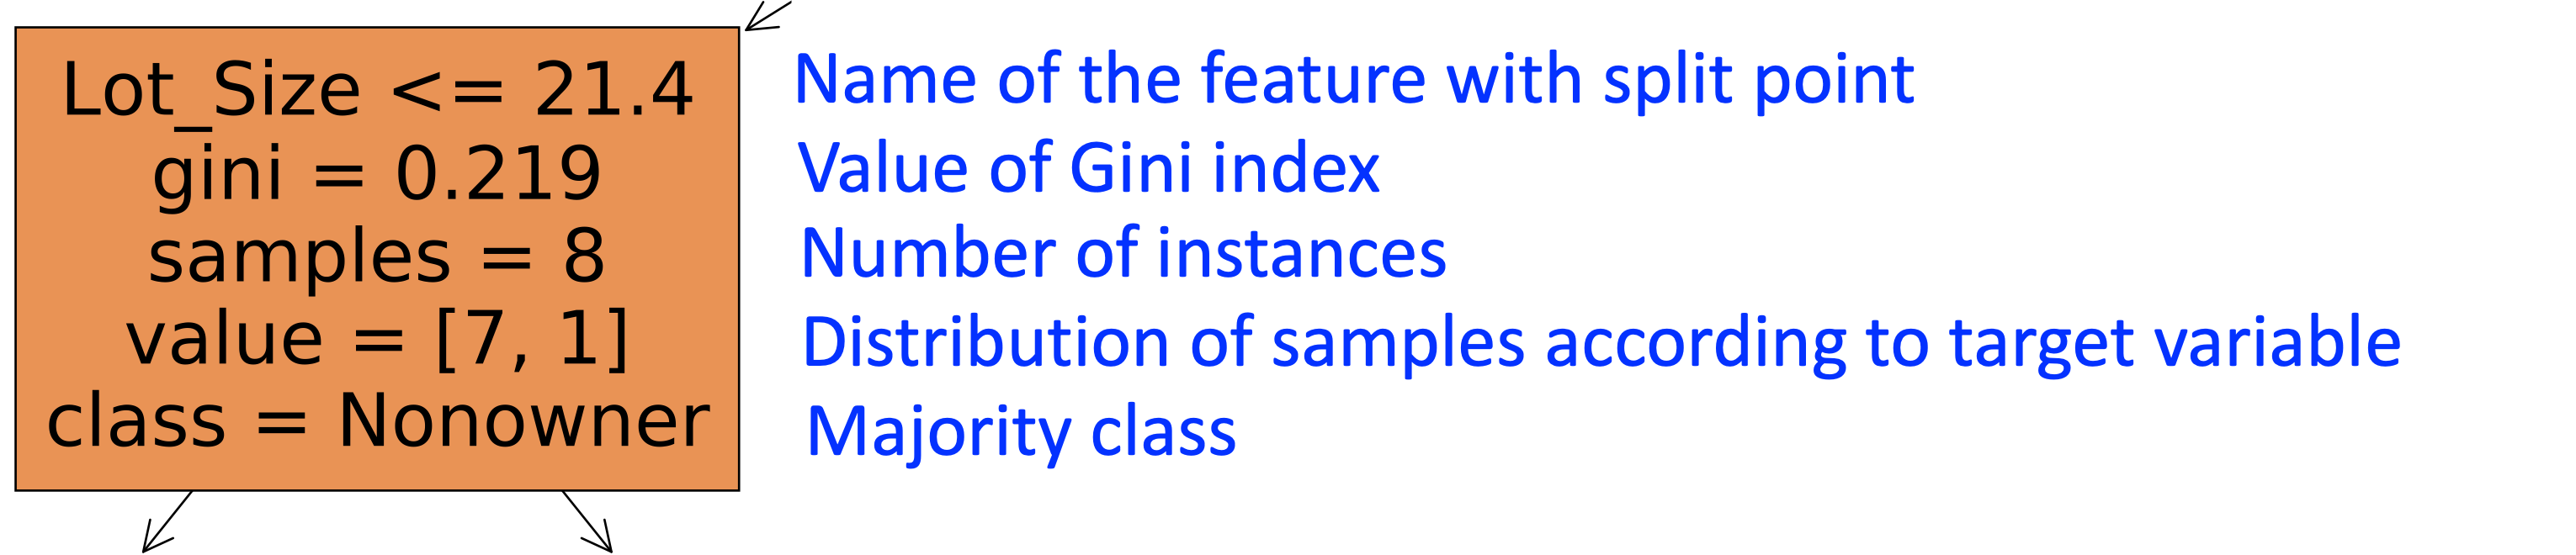

# Case Study: Predicting the Acceptance of Personal Loan

<img src="https://rigidfinance.com/wp-content/uploads/2022/03/personal-loan.jpg" width=600 height = 280 />

Data to be used: *Bank.csv*

Following is the description of columns in *Bank.csv* file

<TABLE CAPTION="Personal Loan Dataset">
<TR><TD><B>Variable</B></TD><TD><B>Description</B></TD></TR>
<TR><TD>Age</TD><TD>Customer's age</TD></TR>
<TR><TD>Experience</TD><TD># years of professional experience</TD></TR>
<TR><TD>Income</TD><TD>Annual income of the customer (&#36;000)</TD></TR>
<TR><TD>Family</TD><TD>Family size of the customer</TD></TR>
<TR><TD>CCAvg</TD><TD>Avg. spending on credit cards per month (&#36;000)</TD></TR>
<TR><TD>Education</TD><TD>Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional</TD></TR>   
<TR><TD>Mortgage</TD><TD>Value of house mortgage if any. (&#36;000)</TD></TR>
<TR><TD>Securities Account</TD><TD>Does the customer have a securities account with the bank?</TD></TR>
<TR><TD>CD Account</TD><TD>Does the customer have a certificate of deposit (CD) account with the bank?</TD></TR>
<TR><TD>Online</TD><TD>Does the customer use internet banking facilities?</TD></TR>
<TR><TD>CreditCard</TD><TD>Does the customer use a credit card issued by the bank?</TD></TR>
<TR><TD>Personal Loan (outcome)</TD><TD>Did this customer accept the personal loan offered in the campaign?</TD></TR>
</TABLE>

In `Personal Loan` Column:

- 0: Did not accept loan
- 1: Accepted loan

## Import Packages

In [ ]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import StratifiedKFold # For creating folds

# Import Package to implement GridSearch CV (Hyperparameter Tuning Method 1)
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV (Hyperparameter Tuning Method 2)
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

## Import Data

In [ ]:
# Import Data
bank_df = pd.read_csv('Bank.csv')
bank_df.head()

In [ ]:
# Summary of the data
bank_df.info()

In [ ]:
# Distribution of Personal Loan column
bank_df['Personal Loan'].value_counts(normalize = True)

**NOTE**: Among 5000 customers, only 480 (= 9.6\%) accepted the personal loan.

This is an example of **Imbalanced Dataset** where the distribution of instances across the classes is not equal.

### Step 1: Selecting data correponding to Input Features `X` and Outcome `y`



In [ ]:
X = bank_df.drop(columns = ['Personal Loan'])
y = bank_df['Personal Loan']

### Step 2: Dealing with Categorical Variables

**Categorical variables are those which can take values from a finite set.**

- Using the **one-hot encoding method**, a new dummy/indicator variable is created for each categorical variable to represent the presence (1) or absence (0) of the categorical variable.

- `pd.get_dummies()` allows us to create dummy variables. See this [link](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [ ]:
cat_var = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
X_encoded = pd.get_dummies(X, columns = cat_var)

In [ ]:
X_encoded.head()

In [ ]:
y.head()

### Step 3: Data Partitioning into train and test sets

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.3, random_state = 1)

Note: As a result of data partitioning, you will have four subsets of data: 2 sets for `X_encoded` (`train_X`, `test_X`) and 2 sets for `y` (`train_Y`, `test_Y`).

**Two main things to focus here:**
1. `test_size`
2. `random_state`

`random_state` is basically used for reproducing the problem every time you run the code.

If you do not use a `random_state` in `train_test_split`, every time you make the split you might get a different set of train and test data points.

## Hyperparamters of Decision Trees

### `max_depth`:
- The maximum depth of the tree.
    - If this is not specified in the Decision Tree model, the nodes will be expanded until all leaf nodes are pure or until all leaf nodes contain less than min_samples_split.
- Default = None
- Input options → integer

In [ ]:
# Changing max_depth
# Fitting Decision Tree Model on Train Set
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)
clf.fit(train_X, train_y)


# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = clf,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

**What happens if you increase the value of `max_depth`?**

### `min_samples_split`:
- The minimum samples required to split an internal node.
    - If the amount of sample in an internal node is less than the min_samples_split, then that node will become a leaf node.
- Default = 2
- Input options → integer

In [ ]:
# Changing min_samples_split
# Fitting Decision Tree Model on Train Set
clf = DecisionTreeClassifier(min_samples_split = 100, random_state = 0)
clf.fit(train_X, train_y)


# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = clf,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

**What happens if you increase the value of `min_samples_split`?**

### `min_samples_leaf`:
- The minimum samples required to be at a leaf node.
    - Therefore, a split can only happen if it leaves at least the min_samples_leaf in both of the resulting nodes.
- Default = 1
- Input options → integer

In [ ]:
# Changing min_samples_leaf
# Fitting Decision Tree Model on Train Set
clf = DecisionTreeClassifier(min_samples_leaf = 75, random_state = 0)
clf.fit(train_X, train_y)


# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = clf,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

**What happens if you increase the value of `min_samples_leaf`?**

## Hyperparameter Tuning using Grid Search Cross Validation

### Hyperparameter Tuning:
It refers to the process of choosing the optimal set of hyperparameters for a model.

**Example**: Selecting the best value of `max_depth` while using Decision Tree model

**Implementing GridSearch CV**
- Grid Search is used to automate the process of hyperparameter tuning.
- Grid Search CV trains the estimator on all combinations of the parameter grid and returns the model with the best CV score.

In [ ]:
# Define your model
classifier = DecisionTreeClassifier(random_state = 42)

In [ ]:
# Start with an initial guess for parameters
hyper_params = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60],
    'min_samples_leaf': [10, 20, 30, 40, 100]
}

**How many experiments do we have in this case?**

<h2 align="left">Stratified K-folds</h1>

<img src="https://drive.google.com/uc?id=13ledA4G1WoI2OJIUvgeb-eGc3Ik9Nc_a" width="700" style="float: center"/>

In [ ]:
# Creating folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

### To create folds, we use `StratifiedKFold()` function that takes the following input arguments:

- `n_splits`: Number of folds (default: 5)
- `shuffle`: Whether to shuffle the data before splitting into folds/batches (bool: True/False)
- `random_state`: When shuffle is True, random_state affects the ordering of the indices, which controls the randomness of each fold

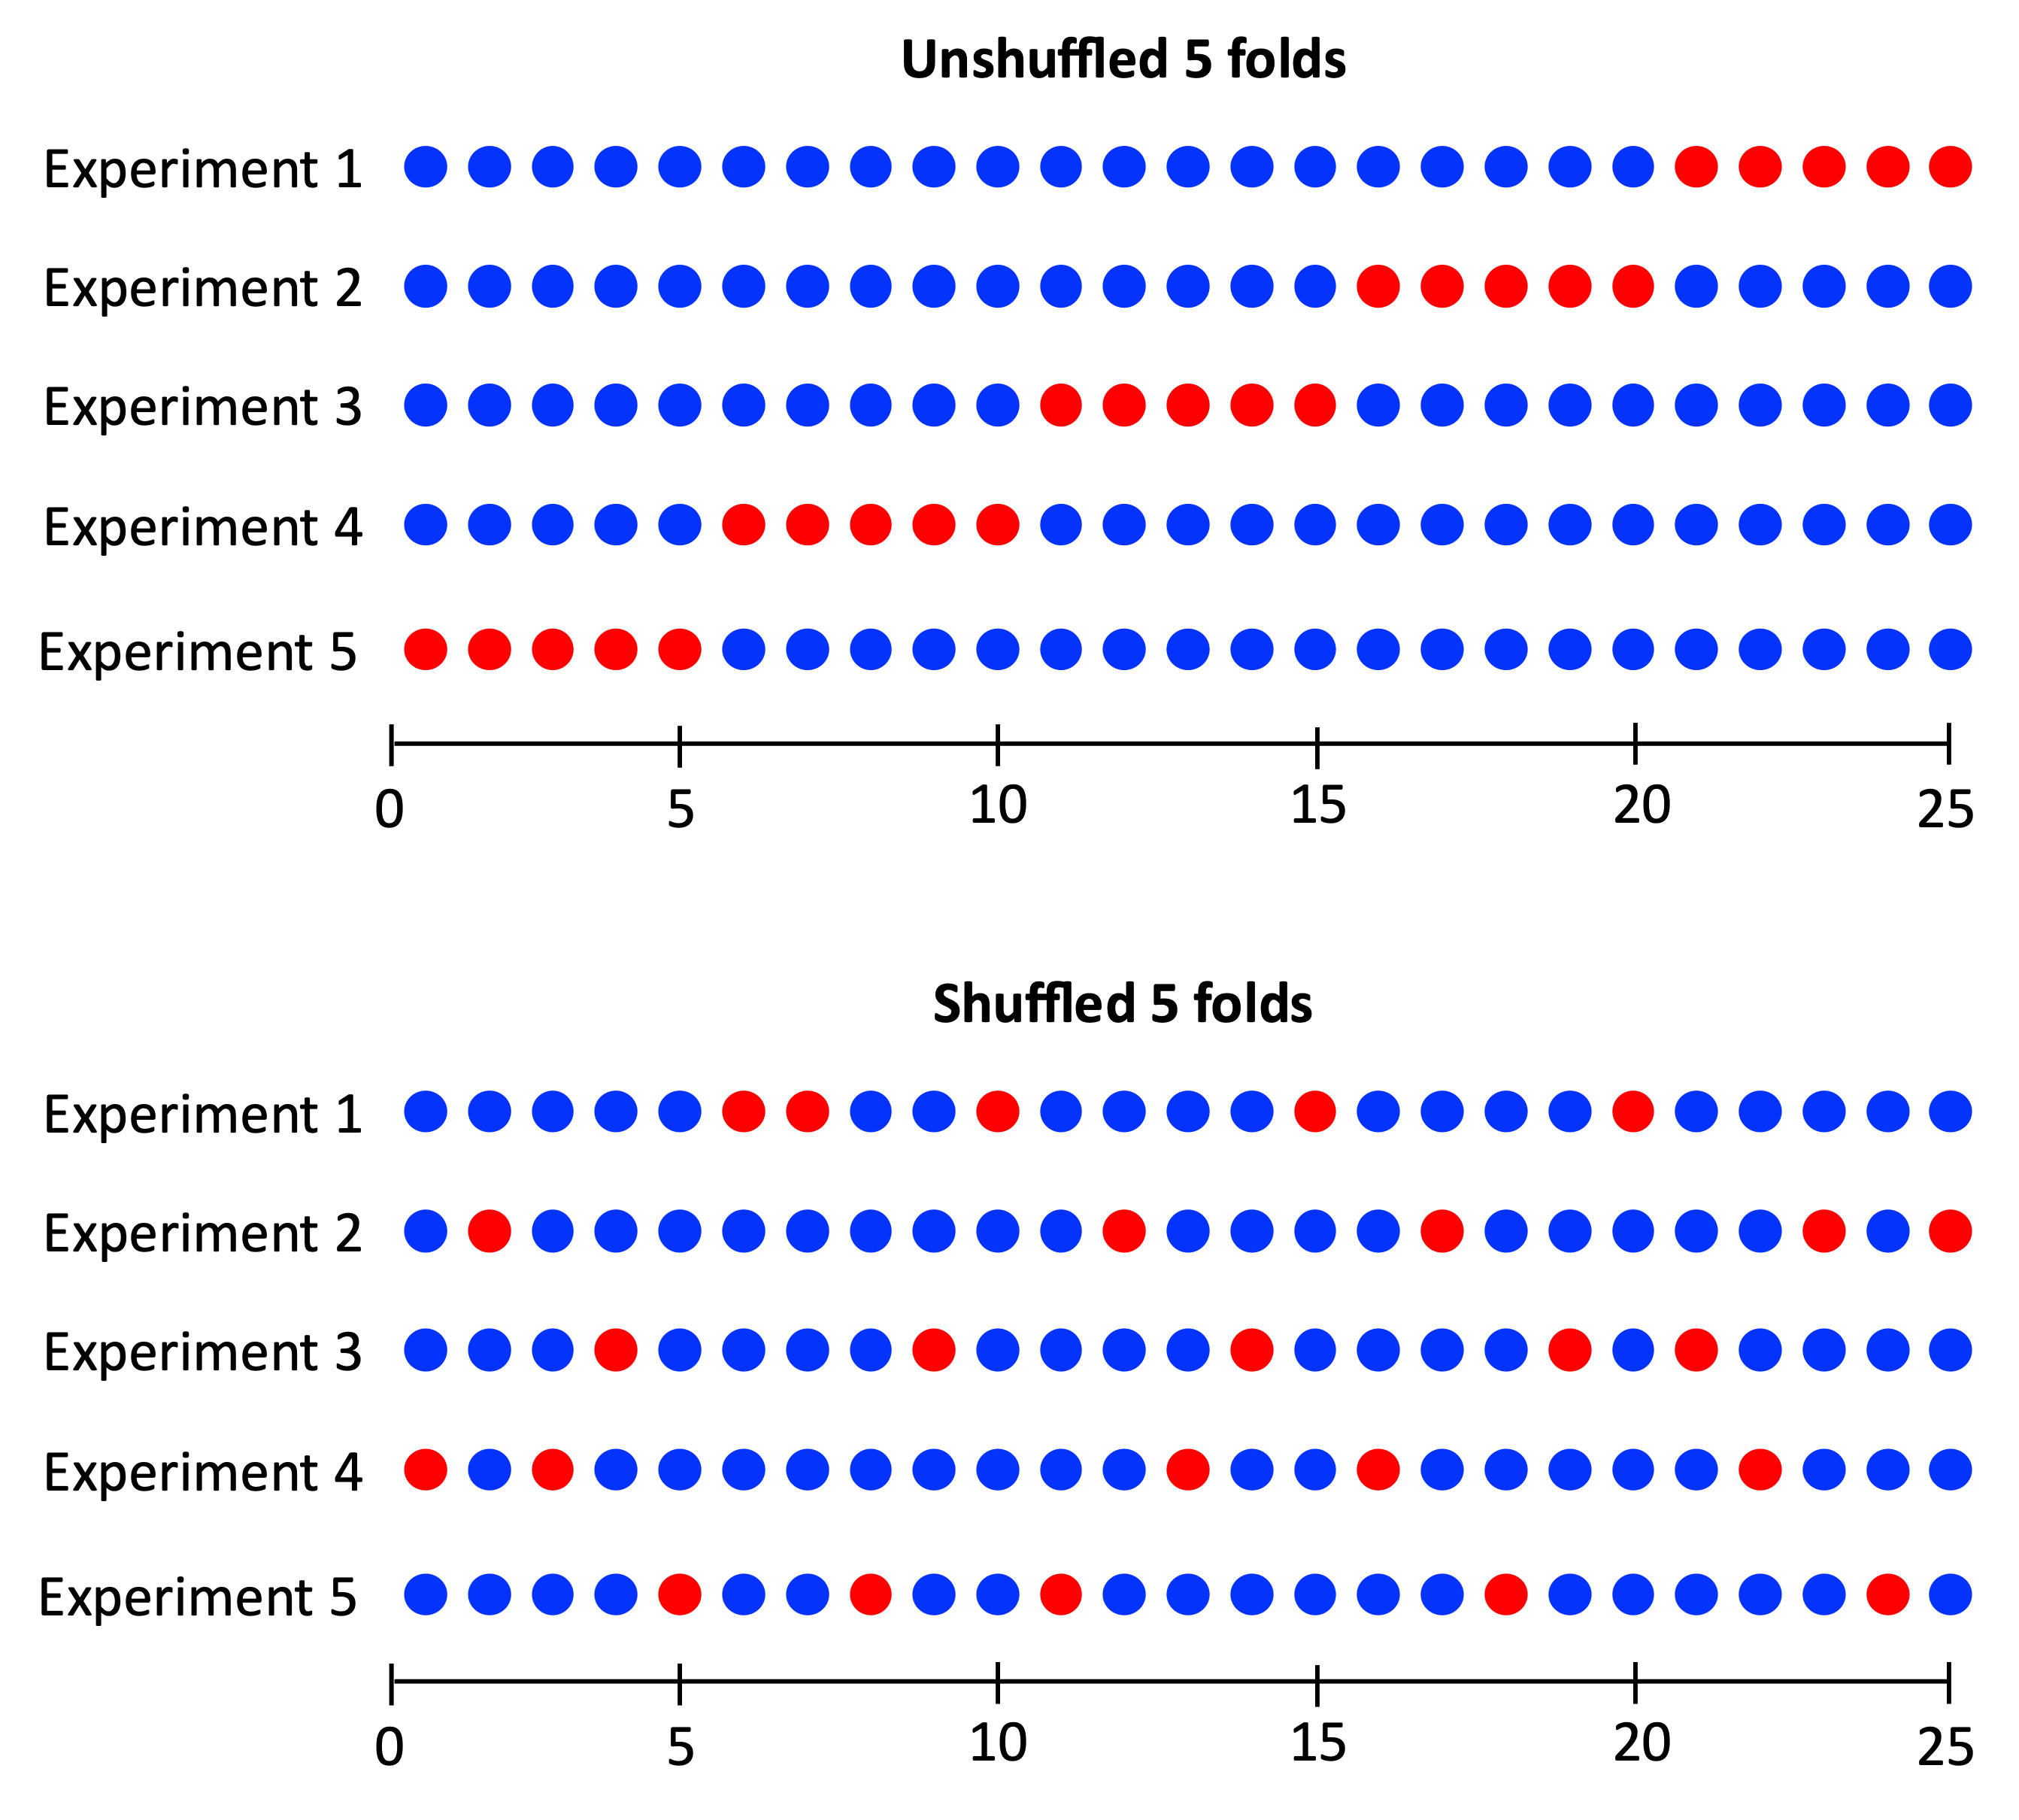

- Data might follow a specific order and it might be risky to select the data in order of appearance.
- That can be solved by setting KFold’s shuffle parameter to `True`.
- In that case, KFold will randomly pick the datapoints which would become part of the train and test set.


In [ ]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier,
                        param_grid = hyper_params,
                        scoring = 'f1_weighted',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

**For more information on Grid Search CV:**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

In [ ]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

In [ ]:
# Adapt grid based on result from initial grid search
hyper_params_new = {
    'max_depth': list(range(2, 12)),
    'min_samples_leaf': list(range(2, 12)),
    'min_samples_split': list(range(15, 24))
}

In [ ]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier,
                        param_grid = hyper_params_new,
                        scoring= 'f1_weighted',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

In [ ]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

In [ ]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

In [ ]:
# Storing best model
bestClassTree = model_cv.best_estimator_

# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = bestClassTree,
                   feature_names = train_X.columns,
                   class_names = ['Reject', "Accept"],
                   filled = True)

### Evaluating the performance of tuned model on train set

In [ ]:
# First make predictions on train set
y_pred_train = model_cv.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, y_pred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))
plt.rcParams.update({'font.size': 15})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

### Evaluating the performance of tuned model on test set

In [ ]:
# Predictions on test set
y_pred = model_cv.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (6, 6))

# Display Confusion Matrix
disp.plot(cmap = 'BuPu', ax = ax);

In [ ]:
# Generating Classification Report
print("Classification Report - \n",
      classification_report(test_y, y_pred))

## Prediction Probabilities

In [ ]:
# Getting prediction probabilites
prob = model_cv.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

# Creating columns for rejection and acceptance prob.
result[['Prob. of Reject (0)','Prob. of Accept (1)']] = pd.DataFrame(prob.tolist(), index = result.index)

display(result)
# Saving dataframe as a csv file
result.to_csv('Prediction Results.csv', index = False)

## Feature Importance

Degree of **usefulness** of a specific input feature for a current model and prediction

*We will see the process of calculating Feature Importances in the next lecture*

In [ ]:
# Storing importance values from the best fit model
importance = model_cv.best_estimator_.feature_importances_

In [ ]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp

In [ ]:
feature_imp_nonzero = feature_imp[feature_imp['Importance'] != 0.0]
feature_imp_nonzero

In [ ]:
# Bar plot
plt.figure(figsize=(10, 5), dpi = 100)
plt.barh(feature_imp_nonzero['Feature'], feature_imp_nonzero['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");